<a href="https://colab.research.google.com/github/jeguns/EP7192/blob/main/Capitulo_6/Unidad_6_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del caso

Mediante el archivo **datos_u6.csv** se busca analizar el consumo mensual de energía junto a diversas características de un edificio y factores ambientales. Contiene datos de varios tipos de edificios, el metraje cuadrado, el número de ocupantes, los electrodomésticos utilizados, la temperatura promedio y el día de la semana.


# Lectura de datos

In [ ]:
import pandas as pd
datos = pd.read_csv('datos_u6.csv')
datos = datos.rename(columns={
    datos.columns[0]: "TipoEdificio",
    datos.columns[1]: "AreaPies2",
    datos.columns[2]: "Ocupantes",
    datos.columns[3]: "Electro",
    datos.columns[4]: "Temperat",
    datos.columns[5]: "DiaSemana",
    datos.columns[6]: "Consumo"
})
datos.head(10)

,TipoEdificio,AreaPies2,Ocupantes,Electro,Temperat,DiaSemana,Consumo
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17
5,Commercial,37377,26,32,16.24,Weekend,4687.67
6,Industrial,38638,92,14,21.01,Weekend,5526.83
7,Residential,34950,60,18,28.24,Weekday,4116.32
8,Industrial,29741,99,44,13.08,Weekday,5841.65
9,Residential,17467,42,36,28.84,Weekday,3419.13


# Prueba de hipótesis para una media

¿El consumo promedio mensual de energía eléctrica es superior a los 4000 Kwh?
$$H_0:\mu\leq4000\qquad H_1:\mu>4000\qquad \alpha = 0.05$$

In [ ]:
from scipy import stats
from scipy.stats import t
consumo = datos["Consumo"]
t_stat, p_value = stats.ttest_1samp(consumo, alternative = "greater", popmean = 4000)
print(f"T statistic: {t_stat}")
print(f"One-sided p-value: {p_value}")

T statistic: 5.6330164879406714
One-sided p-value: 1.1508459209477364e-08


El pvalor se obtiene de la siguiente manera:
$$pv = P(t_{999}>5.633)=1.151\times10^{-8}$$

In [ ]:
t.sf(x = 5.633, df = 999)

np.float64(1.1509526023903187e-08)

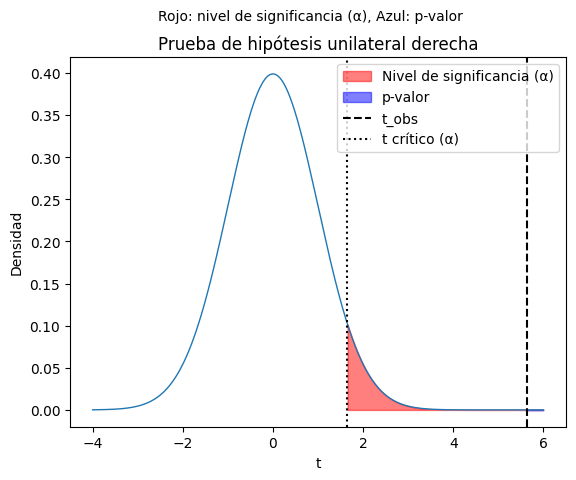

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t_obs = 5.633
alpha = 0.05
df = 999

x_vals = np.linspace(-4, 6, 1000)
y_vals = t.pdf(x_vals, df)

t_crit = t.ppf(1 - alpha, df)
alpha_x = x_vals[x_vals >= t_crit]
alpha_y = y_vals[x_vals >= t_crit]
pval_x = x_vals[x_vals >= t_obs]
pval_y = y_vals[x_vals >= t_obs]

plt.plot(x_vals, y_vals, linewidth=1)
plt.fill_between(alpha_x, alpha_y, color='red', alpha=0.5, label='Nivel de significancia (α)')
plt.fill_between(pval_x, pval_y, color='blue', alpha=0.5, label='p-valor')
plt.axvline(t_obs, color='black', linestyle='--', label='t_obs')
plt.axvline(t_crit, color='black', linestyle=':', label='t crítico (α)')

plt.title("Prueba de hipótesis unilateral derecha")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Decisión: Se rechaza $H_0$

Conclusión: Con un nivel de significancia del 5%, sí existe suficiente evidencia estadística para afirmar que el consumo promedio mensual de energía eléctrica es superior a los 4000 Kwh

# Prueba de hipótesis para una varianza


¿La variabilidad de las temperaturas es menor a 50 $°C^2$?
$$H_0:\sigma^2\geq50\qquad H_1:\sigma^2<50\qquad \alpha = 0.05$$


In [ ]:
from scipy.stats import chi2

temperat      = datos["Temperat"]
sigma_squared = 50  # varianza hipotética
n             = len(temperat)
sample_var    = temperat.var(ddof=1)  # varianza muestral
chi2_stat     = (n - 1) * sample_var / sigma_squared
p_value       = chi2.cdf(chi2_stat, df=n-1)
print(f"Chi cuadrado calculado: {chi2_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

Chi cuadrado calculado: 1018.5560
p-valor: 0.6735


El pvalor se obtiene de la siguiente manera: $pv=P(\chi^2_{999}<1018.556) = 0.6735$

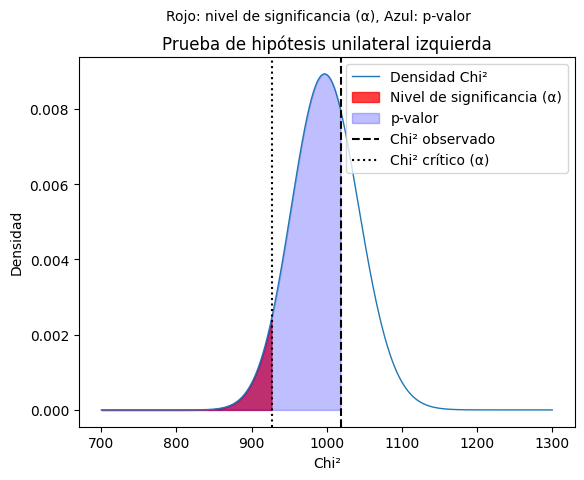

In [ ]:
alpha = 0.05
df    = 999

x_vals   = np.linspace(700, 1300, 1000)
y_vals   = chi2.pdf(x_vals, df)

chi_crit = chi2.ppf(alpha, df)
alpha_x = x_vals[x_vals <= chi_crit]
alpha_y = y_vals[x_vals <= chi_crit]
pval_x = x_vals[x_vals <= chi2_stat]
pval_y = y_vals[x_vals <= chi2_stat]

plt.plot(x_vals, y_vals, linewidth=1, label="Densidad Chi²")
plt.fill_between(alpha_x, alpha_y, color='red', alpha=0.75, label='Nivel de significancia (α)')
plt.fill_between(pval_x, pval_y, color='blue', alpha=0.25, label='p-valor')
plt.axvline(chi2_stat, color='black', linestyle='--', label='Chi² observado')
plt.axvline(chi_crit, color='black', linestyle=':', label='Chi² crítico (α)')

plt.title("Prueba de hipótesis unilateral izquierda")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("Chi²")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Decisión: No se rechaza $H_0$

Conclusión: Con un nivel de significancia del 5%, no existe suficiente evidencia estadística para afirmar que la variabilidad de las temperaturas es menor a 50 $°C^2$

# Prueba de hipótesis para una proporción

Se dice que si un inmueble posee un área superior a los 15 mil pies cuadrados se le considera "grande". ¿Se puede señalar que la proporción de inmuebles grandes es del 60%?
$$H_0:\pi=0.60\qquad H_1:\pi\neq0.60\qquad \alpha = 0.05$$

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

datos["Tamano"] = datos["AreaPies2"].apply(lambda x: "Grande" if x > 15000 else "No grande")
conteo = datos["Tamano"].value_counts()
xn = conteo["Grande"]  # número de casos "Grande"
n_total = conteo.sum()  # total de casos

p0 = 0.60  # proporción hipotética
stat, p_value = proportions_ztest(count=xn, nobs=n_total, value=p0, alternative='two-sided', prop_var=p0)

print(f"Z calculado: {stat:.4f}")
print(f"p-valor: {p_value:.4f}")

Z calculado: 7.1650
p-valor: 0.0000


El pvalor se obtiene de la siguiente manera:
$$Z_{calc}=\frac{0.711-0.6}{\sqrt{\frac{0.6\times0.4}{1000}}}=7.165019$$
$$pv=2P(Z>7.165019)=7.778\times10^{-13}$$

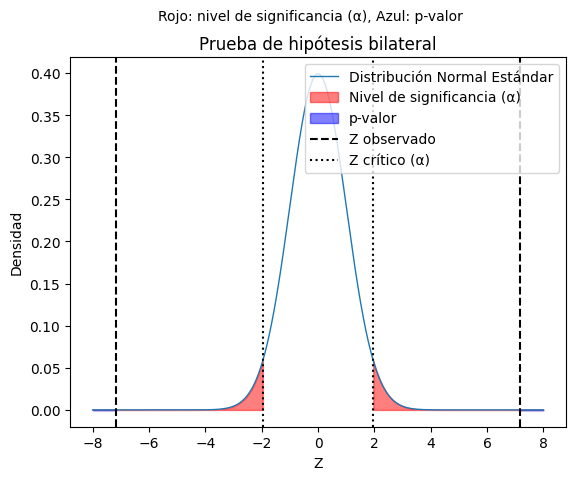

In [ ]:
from scipy.stats import norm

z_obs = 7.165019
alpha = 0.05

x_vals = np.linspace(-8, 8, 1000)
y_vals = norm.pdf(x_vals)

z_crit_right = norm.ppf(1 - alpha / 2)
z_crit_left = norm.ppf(alpha / 2)

alpha_x_left = x_vals[x_vals <= z_crit_left]
alpha_y_left = y_vals[x_vals <= z_crit_left]
alpha_x_right = x_vals[x_vals >= z_crit_right]
alpha_y_right = y_vals[x_vals >= z_crit_right]

pval_x_left = x_vals[x_vals <= -abs(z_obs)]
pval_y_left = y_vals[x_vals <= -abs(z_obs)]
pval_x_right = x_vals[x_vals >= abs(z_obs)]
pval_y_right = y_vals[x_vals >= abs(z_obs)]

plt.plot(x_vals, y_vals, linewidth=1, label="Distribución Normal Estándar")
plt.fill_between(alpha_x_left, alpha_y_left, color='red', alpha=0.5, label='Nivel de significancia (α)')
plt.fill_between(alpha_x_right, alpha_y_right, color='red', alpha=0.5)
plt.fill_between(pval_x_left, pval_y_left, color='blue', alpha=0.5, label='p-valor')
plt.fill_between(pval_x_right, pval_y_right, color='blue', alpha=0.5)
plt.axvline(z_obs, color='black', linestyle='--', label='Z observado')
plt.axvline(-z_obs, color='black', linestyle='--')
plt.axvline(z_crit_right, color='black', linestyle=':', label='Z crítico (α)')
plt.axvline(z_crit_left, color='black', linestyle=':')
plt.title("Prueba de hipótesis bilateral")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("Z")
plt.ylabel("Densidad")
plt.legend(loc='upper right')
plt.show()


Decisión: Se rechaza $H_0$

Conclusión: Con un nivel de significancia del 5%, no existe suficiente evidencia estadística para afirmar que la proporción de inmuebles grandes es del 60%.

# Prueba de hipótesis para dos medias independientes

¿El consumo medio de energía en los edificios industriales supera en más de 500 Kwh a los comerciales? Considerar $\alpha=0.01$.

Primero, se prueba la igualdad de varianzas:
$$H_0:\frac{\sigma^2_1}{\sigma^2_2}=1\qquad H_1:\frac{\sigma^2_1}{\sigma^2_2}\neq1 \qquad \alpha=0.01$$

In [ ]:
from scipy.stats import f
datos_2medias = datos[datos['TipoEdificio'].isin(['Commercial', 'Industrial'])]
grupo_commercial = datos_2medias[datos_2medias['TipoEdificio'] == 'Commercial']['Consumo']
grupo_industrial = datos_2medias[datos_2medias['TipoEdificio'] == 'Industrial']['Consumo']
var1 = grupo_commercial.var(ddof=1)
var2 = grupo_industrial.var(ddof=1)
f_stat = var1 / var2 if var1 > var2 else var2 / var1
df1 = len(grupo_commercial) - 1
df2 = len(grupo_industrial) - 1
p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

print(f"F calculado: {f_stat:.4f}")
print(f"p-valor: {p_value:.4f}")

F calculado: 1.0489
p-valor: 0.6679


In [ ]:
#Prueba Alternativa
from scipy.stats import bartlett
stat_b, p_value_b = bartlett(grupo_commercial, grupo_industrial)
print(f"Bartlett statistic: {stat_b:.4f}, p-value: {p_value_b:.4f}")

Bartlett statistic: 0.1852, p-value: 0.6669


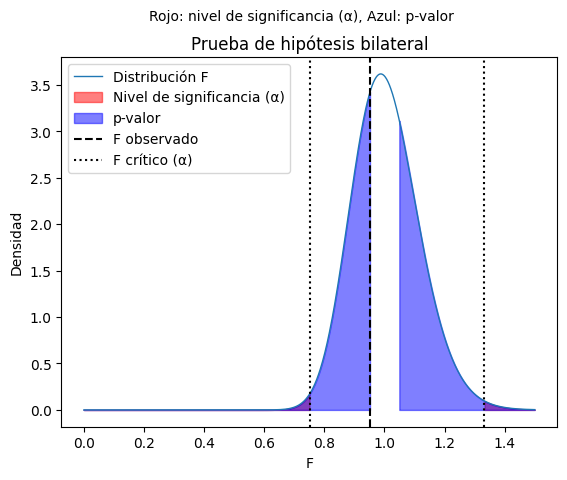

In [ ]:
f_obs = 0.953368
alpha = 0.01
df1 = 335
df2 = 316

x_vals = np.linspace(0, 1.5, 1000)
y_vals = f.pdf(x_vals, df1, df2)

f_crit_left = f.ppf(alpha / 2, df1, df2)
f_crit_right = f.ppf(1 - alpha / 2, df1, df2)

alpha_x_left = x_vals[x_vals <= f_crit_left]
alpha_y_left = y_vals[x_vals <= f_crit_left]
alpha_x_right = x_vals[x_vals >= f_crit_right]
alpha_y_right = y_vals[x_vals >= f_crit_right]
pval_x_right = x_vals[x_vals <= f_obs]
pval_y_right = y_vals[x_vals <= f_obs]
pval_x_left = x_vals[x_vals >= 1 / f_obs]
pval_y_left = y_vals[x_vals >= 1 / f_obs]


plt.plot(x_vals, y_vals, linewidth=1, label="Distribución F")
plt.fill_between(alpha_x_left, alpha_y_left, color='red', alpha=0.5, label='Nivel de significancia (α)')
plt.fill_between(alpha_x_right, alpha_y_right, color='red', alpha=0.5)
plt.fill_between(pval_x_right, pval_y_right, color='blue', alpha=0.5, label='p-valor')
plt.fill_between(pval_x_left, pval_y_left, color='blue', alpha=0.5)
plt.axvline(f_obs, color='black', linestyle='--', label='F observado')
plt.axvline(f_crit_right, color='black', linestyle=':', label='F crítico (α)')
plt.axvline(f_crit_left, color='black', linestyle=':')
plt.title("Prueba de hipótesis bilateral")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("F")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Dado que $pv>\alpha$, entonces no se rechaza $H_0$. En conclusión, las varianzas son homogéneas. Sabiendo esto, se pasa a comparar las medias.

El enunciado señala que se debe verificar la afirmación $\mu_I-\mu_C>500$, sin embargo R toma por defecto los niveles en orden alfabético, es decir primero "Commercial" y luego "Industrial". Hay 2 opciones: Reordenar los niveles, o reordenar la hipótesis. Eligiendo esta última opción tendríamos que la afirmación inicial es equivalente a $\mu_C-\mu_I<-500$.

Por lo tanto:

$$H_0:\mu_C-\mu_I\geq-500 \qquad H_1:\mu_C-\mu_I<-500 \qquad \alpha=0.01$$

In [ ]:
?ttest_ind

Object `ttest_ind` not found.


In [ ]:
from scipy.stats import ttest_ind
datos_2medias = datos[datos['TipoEdificio'].isin(['Commercial', 'Industrial'])]
grupo_commercial = datos_2medias[datos_2medias['TipoEdificio'] == 'Commercial']['Consumo']
grupo_industrial = datos_2medias[datos_2medias['TipoEdificio'] == 'Industrial']['Consumo']
t_stat, p_value = ttest_ind(grupo_commercial, grupo_industrial, equal_var=True)
print(f"T calculado: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")

T calculado: -9.4317
P-valor: 0.0000


In [ ]:
datos

,TipoEdificio,AreaPies2,Ocupantes,Electro,Temperat,DiaSemana,Consumo,Tamano
0,Residential,7063,76,10,29.84,Weekday,2713.95,No grande
1,Commercial,44372,66,45,16.72,Weekday,5744.99,Grande
2,Industrial,19255,37,17,14.30,Weekend,4101.24,Grande
3,Residential,13265,14,41,32.82,Weekday,3009.14,No grande
4,Commercial,13375,26,18,11.92,Weekday,3279.17,No grande
...,...,...,...,...,...,...,...,...
995,Residential,14419,68,44,23.95,Weekend,3661.21,No grande
996,Industrial,12194,7,22,14.67,Weekend,3546.34,No grande
997,Commercial,39562,88,20,32.18,Weekday,5147.21,Grande
998,Residential,8348,67,37,16.48,Weekend,3244.98,No grande


In [ ]:
from scipy.stats import t as t_dist

datos_2medias = datos[datos['TipoEdificio'].isin(['Commercial', 'Industrial'])]

grupo_commercial = datos_2medias[datos_2medias['TipoEdificio'] == 'Commercial']['Consumo']
grupo_industrial = datos_2medias[datos_2medias['TipoEdificio'] == 'Industrial']['Consumo']

diff_muestral = grupo_commercial.mean() - grupo_industrial.mean()

diff_ajustada = diff_muestral - (-500)
n1, n2 = len(grupo_commercial), len(grupo_industrial)
var1, var2 = grupo_commercial.var(ddof=1), grupo_industrial.var(ddof=1)
s2p = ((n1 - 1)*var1 + (n2 - 1)*var2) / (n1 + n2 - 2)
se = (s2p * (1/n1 + 1/n2))**0.5
t_stat = diff_ajustada / se

df = n1 + n2 - 2
p_value = t_dist.cdf(t_stat, df)

print(f"T calculado: {t_stat:.4f}")
print(f"P-valor: {p_value:.4f}")


T calculado: -1.6384
P-valor: 0.0509


¿Cómo se calculó el p-valor?
$$pv = 2P(t_{651}<-1.6384)=0.0509$$

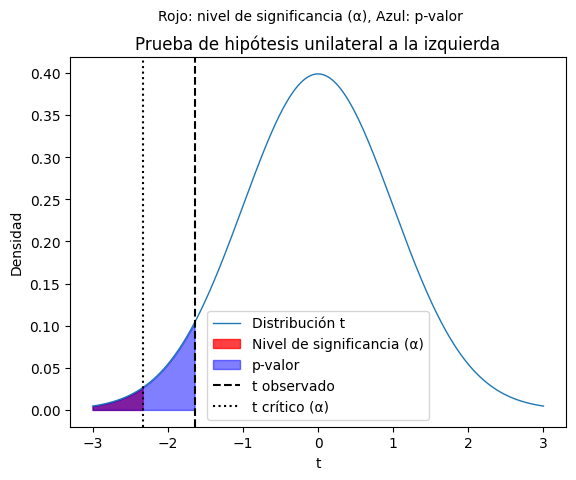

In [ ]:
t_obs = -1.6384
alpha = 0.01
df = 651

x_vals = np.linspace(-3, 3, 1000)
y_vals = t.pdf(x_vals, df)

t_crit = t.ppf(alpha, df)
alpha_x = x_vals[x_vals <= t_crit]
alpha_y = y_vals[x_vals <= t_crit]
pval_x = x_vals[x_vals <= t_obs]
pval_y = y_vals[x_vals <= t_obs]

plt.plot(x_vals, y_vals, linewidth=1, label="Distribución t")
plt.fill_between(alpha_x, alpha_y, color='red', alpha=0.75, label='Nivel de significancia (α)')
plt.fill_between(pval_x, pval_y, color='blue', alpha=0.5, label='p-valor')
plt.axvline(t_obs, color='black', linestyle='--', label='t observado')
plt.axvline(t_crit, color='black', linestyle=':', label='t crítico (α)')
plt.title("Prueba de hipótesis unilateral a la izquierda")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("t")
plt.ylabel("Densidad")
plt.legend()
plt.show()

Decisión: Dado que $pv>\alpha$, no se rechaza la hipótesis nula.

Conclusión: el consumo medio de energía en los edificios industriales no supera en más de 500 Kwh a los comerciales.

# Prueba de hipótesis para dos proporciones

Se dice que si un inmueble posee un área superior a los 15 mil pies cuadrados se le considera "grande". ¿Se puede señalar que la proporción de inmuebles comerciales grandes es mayor que los industriales?

$$H_0:\pi_1-\pi_2\leq0\qquad H_1:\pi_1-\pi_2>0\qquad \alpha=0.05$$

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Filtrar y crear variable "Tamano"
datos_filtrado = datos[datos['TipoEdificio'].isin(['Commercial', 'Industrial'])].copy()
datos_filtrado['Tamano'] = datos_filtrado['AreaPies2'].apply(lambda x: "Grande" if x > 15000 else "No grande")

# Agrupar y contar
tabla = (datos_filtrado
         .groupby(['TipoEdificio', 'Tamano'])
         .size()
         .reset_index(name='n'))

tabla['Prop'] = tabla.groupby('TipoEdificio')['n'].transform(lambda x: x / x.sum())
tabla

,TipoEdificio,Tamano,n,Prop
0,Commercial,Grande,233,0.693452
1,Commercial,No grande,103,0.306548
2,Industrial,Grande,231,0.728707
3,Industrial,No grande,86,0.271293


In [ ]:
x = [tabla.loc[(tabla['TipoEdificio'] == 'Commercial') & (tabla['Tamano'] == 'Grande'), 'n'].values[0],
     tabla.loc[(tabla['TipoEdificio'] == 'Industrial') & (tabla['Tamano'] == 'Grande'), 'n'].values[0]]

n_totals = [tabla.loc[tabla['TipoEdificio'] == 'Commercial', 'n'].sum(),
            tabla.loc[tabla['TipoEdificio'] == 'Industrial', 'n'].sum()]

stat, p_value = proportions_ztest(count=x, nobs=n_totals, alternative='larger')

print(f"Z calculado: {stat:.4f}")
print(f"P-valor: {p_value:.4f}")

Z calculado: -0.9928
P-valor: 0.8396


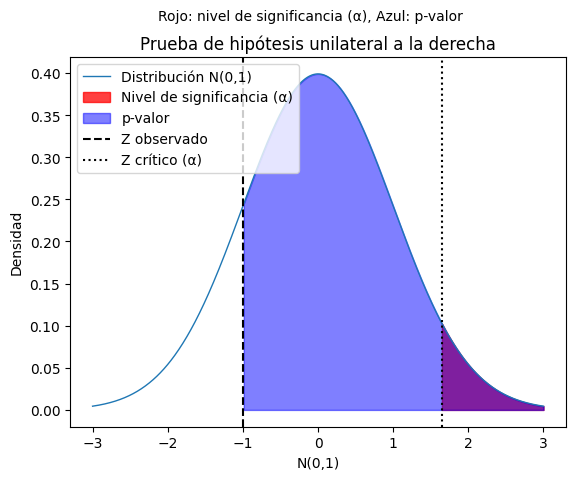

In [ ]:
z_obs = -0.9928357
alpha = 0.05

x_vals = np.linspace(-3, 3, 1000)
y_vals = norm.pdf(x_vals)

z_crit = norm.ppf(1 - alpha)
alpha_x = x_vals[x_vals >= z_crit]
alpha_y = y_vals[x_vals >= z_crit]
pval_x = x_vals[x_vals >= z_obs]
pval_y = y_vals[x_vals >= z_obs]


plt.plot(x_vals, y_vals, linewidth=1, label="Distribución N(0,1)")
plt.fill_between(alpha_x, alpha_y, color='red', alpha=0.75, label='Nivel de significancia (α)')
plt.fill_between(pval_x, pval_y, color='blue', alpha=0.5, label='p-valor')
plt.axvline(z_obs, color='black', linestyle='--', label='Z observado')
plt.axvline(z_crit, color='black', linestyle=':', label='Z crítico (α)')
plt.title("Prueba de hipótesis unilateral a la derecha")
plt.suptitle("Rojo: nivel de significancia (α), Azul: p-valor", fontsize=10)
plt.xlabel("N(0,1)")
plt.ylabel("Densidad")
plt.legend(loc = "upper left")
plt.show()